In [0]:
import pandas as pd 
import matplotlib

movies = pd.read_csv('https://raw.githubusercontent.com/Brunorm96/Dataset-Movie-Lens---QuaretenaDados-Aula-01/master/movies.csv')
rate =pd.read_csv('https://raw.githubusercontent.com/Brunorm96/Dataset-Movie-Lens---QuaretenaDados-Aula-01/master/ratings.csv')

#Adiciona nota média dos filmes no DF movies
mean_rating = rate.groupby("movieId")["rating"].mean()
movies = movies.join(mean_rating, on="movieId")


# Desafio 2 :

Mudar o nome da coluna nota do dataframe movies para nota_média após o join.

In [0]:
movies = movies.rename(columns={"rating":"mean_rating"})
movies.head()

# Desafio 1 :


O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
movies["mean_rating"].isnull().sum()

In [0]:
movies_no_rating = movies["mean_rating"].isnull()

In [0]:
movies[movies_no_rating]

# Desafio 3 :

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
num_rate = rate.groupby("movieId")["rating"].count()
movies = movies.join(num_rate, on="movieId")
movies = movies.rename(columns={"rating":"num_rate"})

In [0]:
movies.head()

# Desafio 4 :

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
movies["mean_rating"] = movies["mean_rating"].round(2)

# Desafio 5 :

Descobrir os generos dos filmes (quais são eles, únicos).

In [0]:
generos = []
for i in movies["genres"].str.split("|"):
  for k in i:
    if not k in generos:
      generos.append(k)

generos

#generos = list(movies["genres"].str.get_gummies("|"))

# Desafio 6 :

Contar o número de aparições de cada genero.

In [0]:
generos_aparicoes = movies["genres"].str.get_dummies(sep="|").sum().sort_values(ascending = False)
generos_aparicoes

# Desafio 7 :

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

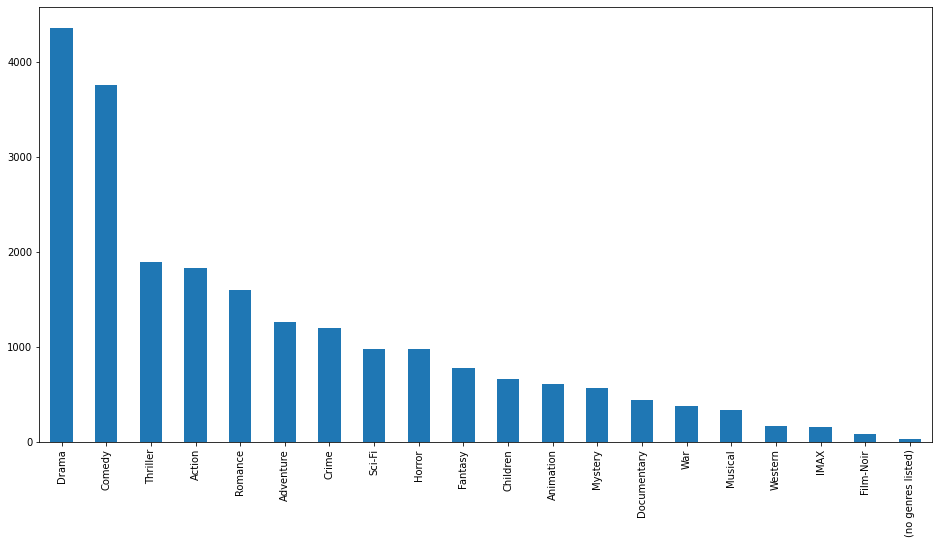

In [11]:
generos_aparicoes.plot(kind="bar", figsize=(16,8))